In [7]:
from Network import PINN, NetworkTrainer
from Physics import *
from Physics import NVS

In [8]:
model0 = PINN(width=32, length=6, is_steady=True)

## Define Physics

In [9]:
pde_points = 1600
bc_points = pde_points//4
W = 1.0
L = 3.0
def calc_loss():
    nonslip_x_above = Conditions.define_conditions(range_x=[0,L], range_y=W, range_t=None, num_points=bc_points, target_quantity_dict = {'u':0.0, 'v':0.0, 'p_y':0.0})
    nonslip_x_below = Conditions.define_conditions(range_x=[0,L], range_y=0, range_t=None, num_points=bc_points, target_quantity_dict = {'u':0.0, 'v':0.0, 'p_y':0.0})
    inlet = Conditions.define_conditions(range_x=0, range_y=[0,W], range_t=None, num_points=bc_points, target_quantity_dict = {'u':0.5, 'v':0.0, 'p_x':0.0})
    outlet = Conditions.define_conditions(range_x=L, range_y=[0,W], range_t=None, num_points=bc_points, target_quantity_dict = {'u_x':0, 'v_x':0, 'p':0.0})

    bc_loss = Conditions.loss_calc([nonslip_x_above, nonslip_x_below, inlet, outlet], model0)
    pde_loss = NVS.loss_cal(model=model0, range_x=[0,L], range_y=[0,W], num_points=pde_points)
    total_loss = bc_loss + pde_loss
    
    return {"bc_loss": bc_loss, "pde_loss": pde_loss, "total_loss": total_loss}

In [10]:
model1 = NetworkTrainer.train_adam(model=model0, calc_loss=calc_loss, learning_rate=0.001, epochs=3000, print_every=300)

epoch 1, total_loss: 0.12567, bc_loss: 0.12566, pde_loss: 0.00001
epoch 301, total_loss: 0.02146, bc_loss: 0.01787, pde_loss: 0.00359
epoch 601, total_loss: 0.00833, bc_loss: 0.00785, pde_loss: 0.00048
epoch 901, total_loss: 0.00537, bc_loss: 0.00478, pde_loss: 0.00059
epoch 1201, total_loss: 0.00333, bc_loss: 0.00296, pde_loss: 0.00037
epoch 1501, total_loss: 0.00467, bc_loss: 0.00428, pde_loss: 0.00038
epoch 1801, total_loss: 0.00215, bc_loss: 0.00196, pde_loss: 0.00020
epoch 2101, total_loss: 0.00158, bc_loss: 0.00145, pde_loss: 0.00013
epoch 2401, total_loss: 0.00202, bc_loss: 0.00181, pde_loss: 0.00021
epoch 2701, total_loss: 0.00148, bc_loss: 0.00135, pde_loss: 0.00013


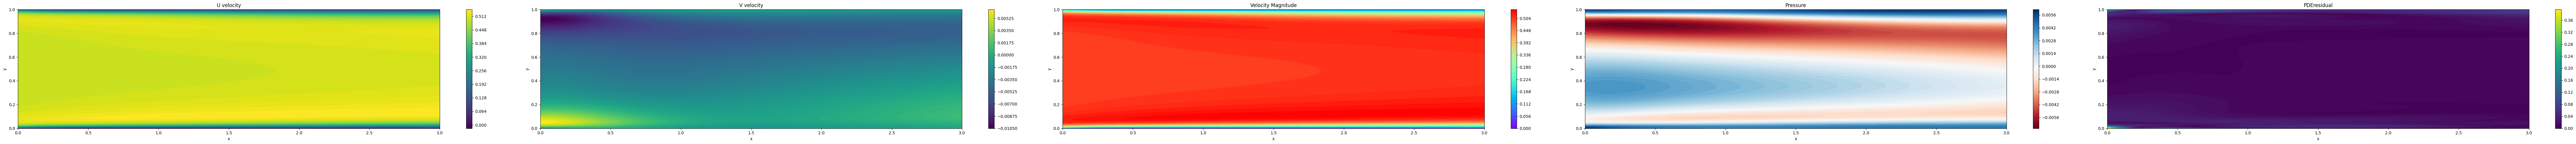

In [11]:
from Visualize import Visualization
fig = Visualization.visualize_sol(model1,[0,L],[0,W],200)
fig.savefig('channel_flow_steady.png')

In [12]:
print(model1.loss_history_dict["bc_loss"][-1])

0.001577669638209045
